# Capstone 1: Chess

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
games = pd.read_csv('data/games.csv')

In [2]:
moves = games['moves']
match = moves.iloc[1]
match_list = np.array(match.split(' '))
match_array = match_list.reshape(-1,2)
rem_pieces = 32 - match.count('x')


In [3]:
def remaining_pieces(moves):
    '''
    Returns the number of pieces remaining on the board at the end of the match.
    Parameters
    ----------
    moves (string) = input move list

    Output
    ------
    number of remaining pieces (integer) 
    '''
    return 32 - moves.count('x')

In [4]:
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [133]:
games['eco_group'] = games['opening_eco'].apply(lambda x: x[0])

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_differential
eco_group,,,,,,,,,,,,,,,,,
A,3973,3973,3973,3973,3973,3973,3973,3973,3973,3973,3973,3973,3973,3973,3973,3973,3973
B,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238,5238
C,7658,7658,7658,7658,7658,7658,7658,7658,7658,7658,7658,7658,7658,7658,7658,7658,7658
D,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683
E,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506


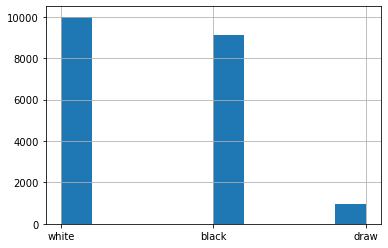

In [5]:
# scatter = games['turns','white_rating','black_rating','opening_ply']
# pd.plotting.scatter_matrix(scatter)
games['winner'].hist()

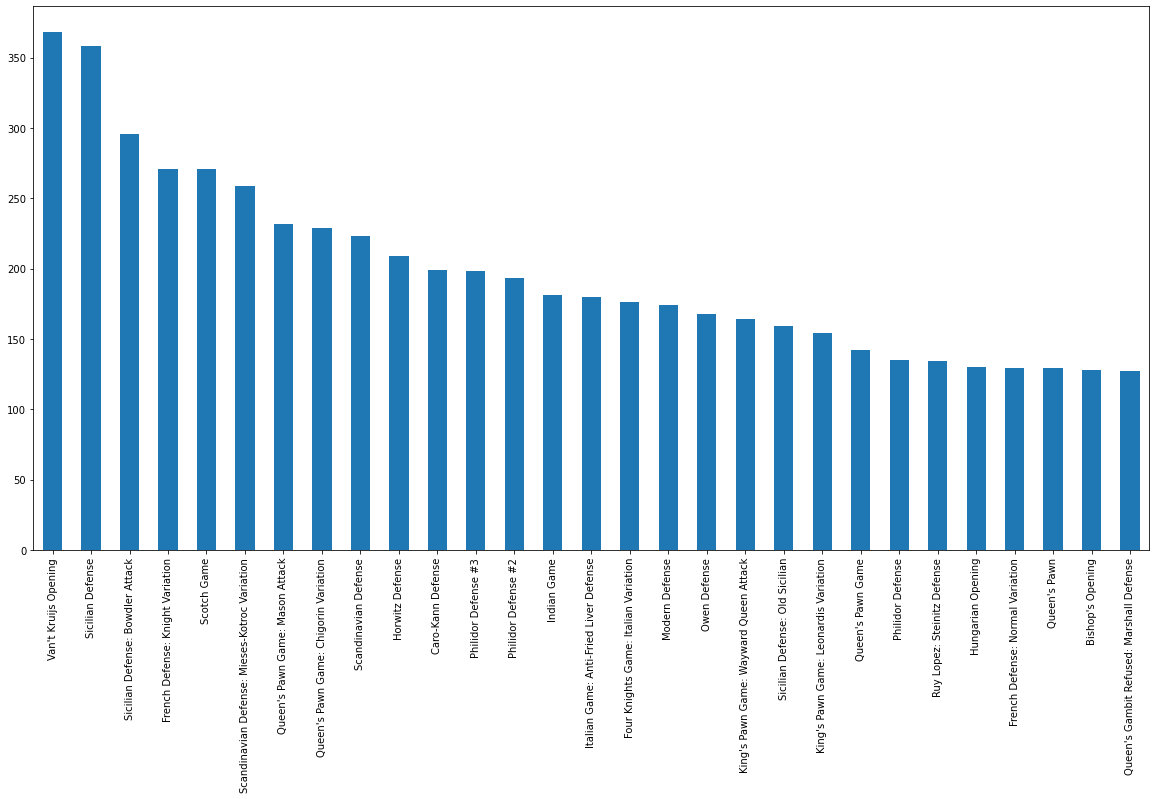

In [6]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_name'].value_counts()[:29].plot.bar()

In [7]:
openings = games['opening_name'].value_counts()
vant = games[games['opening_name'] == openings.keys()[0]]
sicilian = games[games['opening_name'] == openings.keys()[1]]

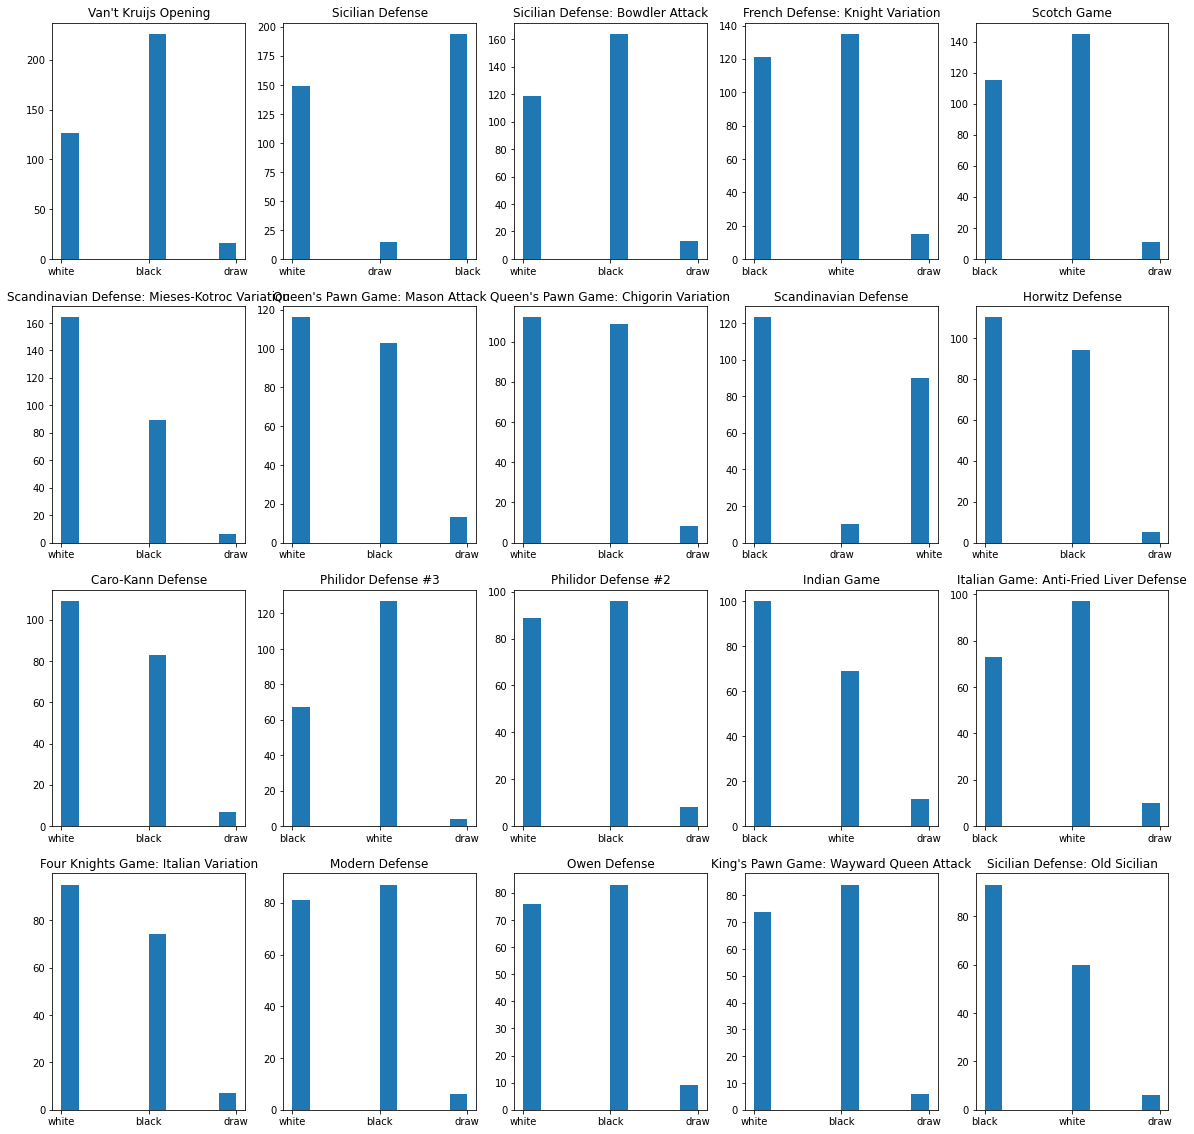

In [8]:
bins = ['white','black','draw']
fig, ax = plt.subplots(4,5,figsize=(20,20))
ax = ax.flatten()
for i in range(20):
    ax[i].hist(games[games['opening_name'] == openings.keys()[i]]['winner'])
    ax[i].set_title(openings.keys()[i])

Text(0.5, 1.0, 'Sicilian Defense: Bowdler Attack')

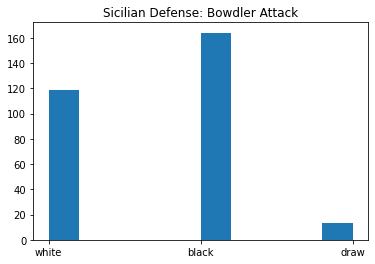

In [9]:
plt.hist(games[games['opening_name'] == openings.keys()[2]]['winner'])
plt.title(openings.keys()[2])

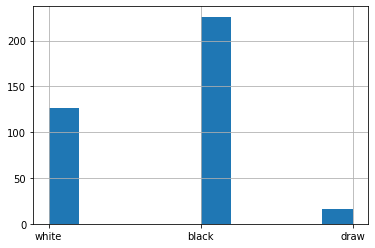

In [10]:
vant['winner'].hist()

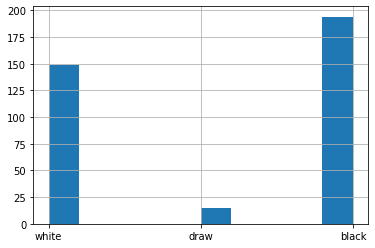

In [11]:
sicilian['winner'].hist()

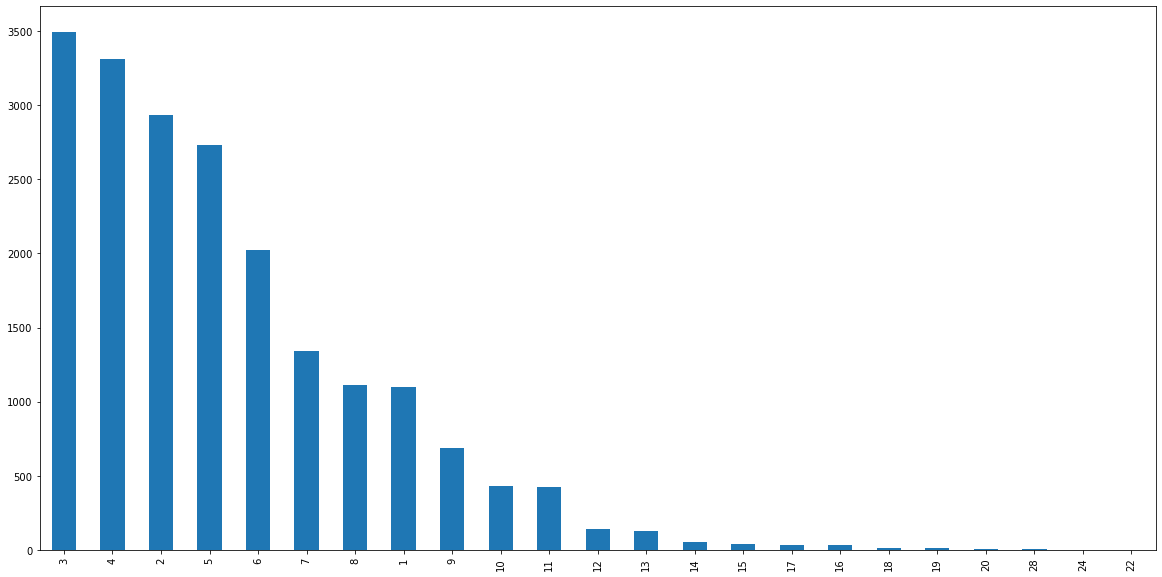

In [12]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_ply'].value_counts()[:29].plot.bar()

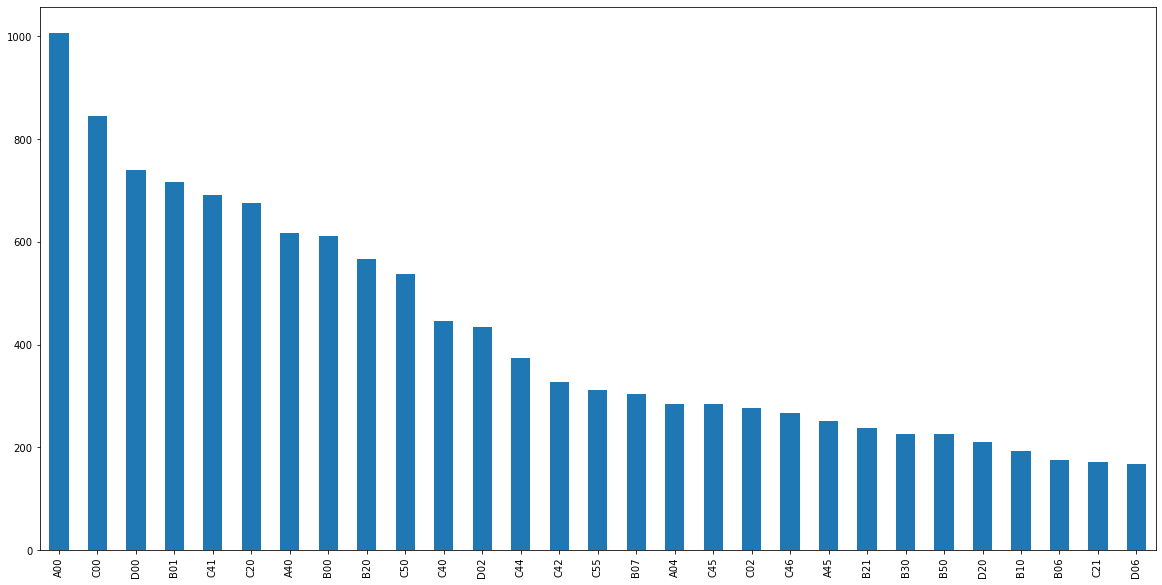

In [13]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_eco'].value_counts()[:29].plot.bar()

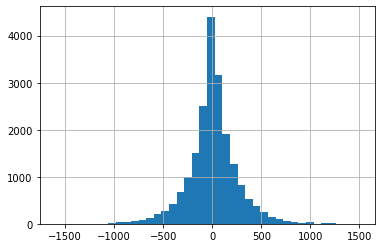

In [14]:
(games['white_rating']-games['black_rating']).hist(bins=40)

In [15]:
games['rating_differential']= games['white_rating']-games['black_rating']

In [16]:
games.groupby(['opening_name','winner']).count()

id  rated  created_at  last_move_at  \
opening_name                    winner                                        
Alekhine Defense                black   21     21          21            21   
                                draw     2      2           2             2   
                                white   23     23          23            23   
Alekhine Defense #2             black    1      1           1             1   
                                draw     1      1           1             1   
...                                     ..    ...         ...           ...   
Zukertort Opening: The Walrus   white    1      1           1             1   
Zukertort Opening: Vos Gambit   black    1      1           1             1   
                                draw     1      1           1             1   
                                white    1      1           1             1   
Zukertort Opening: Wade Defense black    1      1           1             1   

                                        turns  victory_status  increment_code  \
opening_name                    winner                                          
Alekhine Defense                black      21              21              21   
                                draw        2               2               2   
                                white      23              23              23   
Alekhine Defense #2             black       1               1               1   
                                draw        1               1               1   
...                                       ...             ...             ...   
Zukertort Opening: The Walrus   white       1               1               1   
Zukertort Opening: Vos Gambit   black       1               1               1   
                                draw        1               1               1   
                                white       1               1               1   
Zukertort Opening: Wade Defense black       1               1               1   

                                        white_id  white_rating  black_id  \
opening_name                    winner                                     
Alekhine Defense                black         21            21        21   
                                draw           2             2         2   
                                white         23            23        23   
Alekhine Defense #2             black          1             1         1   
                                draw           1             1         1   
...                                          ...           ...       ...   
Zukertort Opening: The Walrus   white          1             1         1   
Zukertort Opening: Vos Gambit   black          1             1         1   
                                draw           1             1         1   
                                white          1             1         1   
Zukertort Opening: Wade Defense black          1             1         1   

                                        black_rating  moves  opening_eco  \
opening_name                    winner                                     
Alekhine Defense                black             21     21           21   
                                draw               2      2            2   
                                white             23     23           23   
Alekhine Defense #2             black              1      1            1   
                                draw               1      1            1   
...                                              ...    ...          ...   
Zukertort Opening: The Walrus   white              1      1            1   
Zukertort Opening: Vos Gambit   black              1      1            1   
                                draw               1      1            1   
                                white              1      1            1   
Zukertort Opening: Wade Defense black              1     

In [17]:
draws = games[games['winner']=='draw']
draws[draws['rating_differential'] > 0].count()

id                     466
rated                  466
created_at             466
last_move_at           466
turns                  466
victory_status         466
winner                 466
increment_code         466
white_id               466
white_rating           466
black_id               466
black_rating           466
moves                  466
opening_eco            466
opening_name           466
opening_ply            466
rating_differential    466
dtype: int64

In [18]:
draws[draws['rating_differential'] == 0].count()

id                     13
rated                  13
created_at             13
last_move_at           13
turns                  13
victory_status         13
winner                 13
increment_code         13
white_id               13
white_rating           13
black_id               13
black_rating           13
moves                  13
opening_eco            13
opening_name           13
opening_ply            13
rating_differential    13
dtype: int64

In [19]:
openings_grp = games.groupby('opening_name')

In [20]:
ratings = games[['white_rating','black_rating','winner']]
ratings['diff'] = ratings['white_rating']-ratings['black_rating']

# for i in ratings.index:
#     if ratings['diff'].iloc[i] > 0 and ratings['winner'].iloc[i] == 'white':
#         ratings['upset'].iloc[i] = 'expected'
#     elif ratings['winner'].iloc[i] == 'draw':
#         ratings['upset'].iloc[i] = 'unknown'
#     elif ratings['diff'].iloc[i] < 0 and ratings.iloc[i]['winner'] == 'black':
#         ratings['upset'].iloc[i] = 'expected'
#     else:
#         ratings['upset'].iloc[i] = 'upset'
# ratings['upset'].hist()

ratings['expected_winner'] = np.where(ratings['white_rating'] >= ratings['black_rating'],'white','black')

ratings['upset'] = np.where(ratings['winner']==ratings['expected_winner'],'expected','upset')

for i in ratings.index:
    if ratings['winner'].iloc[i] == 'draw':
        ratings['upset'].iloc[i] = 'draw'

/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Text(0.5, 1.0, 'Expected Winner Based on ELO')

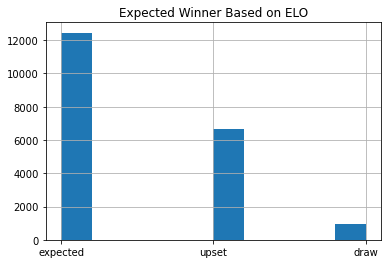

In [21]:
ratings['upset'].hist()
plt.title('Expected Winner Based on ELO')

In [22]:
upsets = ratings['upset'].value_counts()

In [23]:
raw = ratings['upset'].value_counts().values
raw/raw.sum()

array([0.6205504 , 0.33208695, 0.04736265])

In [24]:
pd.array

<function pandas.core.construction.array(data: Sequence[object], dtype: Union[str, numpy.dtype, pandas.core.dtypes.base.ExtensionDtype, NoneType] = None, copy: bool = True) -> pandas.core.dtypes.generic.ABCExtensionArray>

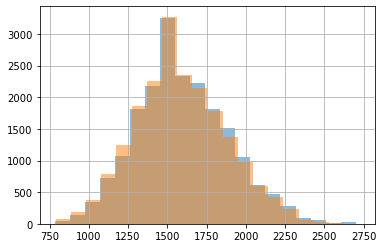

In [33]:
games['white_rating'].hist(bins=20,alpha=0.5)
games['black_rating'].hist(bins=20,alpha=0.5)

In [38]:
rating_arr = games['white_rating'].to_numpy()

In [40]:
rating_arr = np.append(rating_arr,games['black_rating'].to_numpy())

(array([1.140e+02, 2.940e+02, 7.480e+02, 1.515e+03, 2.371e+03, 3.702e+03,
        4.480e+03, 6.552e+03, 4.684e+03, 4.402e+03, 3.587e+03, 2.845e+03,
        1.994e+03, 1.170e+03, 8.890e+02, 4.820e+02, 1.480e+02, 8.400e+01,
        5.300e+01, 2.000e+00]),
 array([ 784.  ,  880.95,  977.9 , 1074.85, 1171.8 , 1268.75, 1365.7 ,
        1462.65, 1559.6 , 1656.55, 1753.5 , 1850.45, 1947.4 , 2044.35,
        2141.3 , 2238.25, 2335.2 , 2432.15, 2529.1 , 2626.05, 2723.  ]),
 <a list of 20 Patch objects>)

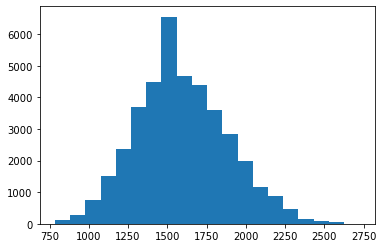

In [45]:
plt.hist(rating_arr,bins=20)

(array([ 247., 1904., 5213.,    0., 6920., 3967.,    0., 1437.,  328.,
          42.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

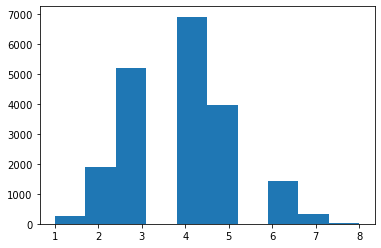

In [58]:
bins = np.arange(750,2750,250)

In [90]:
high_elo_w = games[games['white_rating'] >= 2500]
high_elo_w['white_id'].unique()

array(['lance5500', 'lexisvar', 'shahoviy_komentator', 'blitzbullet',
       'king-bullet', 'le_truand', 'chess-stat', 'justicebot',
       'teatime007', 'chesspirate421'], dtype=object)

In [92]:
high_elo_b = games[games['black_rating'] >= 2500]
high_elo = pd.concat([high_elo_b,high_elo_w])
high_elo

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_differential
4473,rAO6oybn,False,1.480830e+12,1.480830e+12,1,outoftime,white,5+5,ranchowangdu,1500,justicebot,2723,e4,B00,King's Pawn,1,-1223
4797,83vhI5GR,False,1.470150e+12,1.470160e+12,33,resign,black,60+60,nomadre,1884,chess-stat,2500,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f3 Bg7 Be...,B78,Sicilian Defense: Dragon Variation | Yugoslav...,19,-616
5373,zkk33R0Z,False,1.496890e+12,1.496890e+12,40,mate,black,15+0,burks,1016,lance5500,2621,Nc3 c5 Nf3 Nc6 Nb5 Nf6 c4 g6 Ng5 Bg7 d3 O-O Bf...,A00,Van Geet Opening,1,-1605
5374,5gtNuMhB,False,1.496880e+12,1.496880e+12,48,mate,black,10+0,burks,1016,lance5500,2621,Nf3 Nf6 d4 g6 Bg5 Bg7 Nc3 d5 Qd3 Bf5 Qb5+ Nc6 ...,A48,Torre Attack,5,-1605
5671,jvx4GoJV,True,1.503060e+12,1.503060e+12,122,outoftime,black,15+0,justlikemusic,2145,avill050,2588,d4 Nf6 c4 g6 g3 Bg7 Bg2 O-O Nf3 c5 O-O d6 Nbd2...,E64,King's Indian Defense: Fianchetto Variation | ...,12,-443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,8WxfSxC9,False,1.503611e+12,1.503614e+12,107,resign,white,20+10,chesspirate421,2500,avorton,2205,e4 c5 Nf3 e6 g3 Nc6 Bg2 Nf6 Qe2 e5 c3 d6 d3 Be...,B40,Sicilian Defense: French Variation,4,295
16641,ttaaZI0J,False,1.482910e+12,1.482910e+12,79,resign,white,8+0,lance5500,2613,jhonthoth,1904,d4 e6 c4 d5 Nc3 Nf6 Bg5 Be7 e3 h6 Bh4 Nbd7 Nf3...,D53,Queen's Gambit Declined: 4.Bg5 Be7,8,709
18328,JVV78yDG,False,1.500555e+12,1.500556e+12,29,outoftime,white,10+25,lance5500,2621,artem555,1555,e4 c6 d4 d5 Nd2 dxe4 Nxe4 Nf6 Nxf6+ exf6 c3 Be...,B15,Caro-Kann Defense: Tartakower Variation,10,1066
19016,upN6B2c0,False,1.503525e+12,1.503527e+12,69,resign,white,10+15,lance5500,2621,chessmageddon,2206,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Bc4 e5 Nf...,B90,Sicilian Defense: Najdorf | Lipnitsky Attack,11,415


In [95]:
games.sort_values(by='opening_ply',ascending=False)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_differential
4475,9bIIqx54,False,1.480830e+12,1.480840e+12,32,outoftime,black,5+5,ranchowangdu,1500,boseayan,2021,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 c3 O-O Re...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,-521
19412,YaQWFwbu,True,1.502744e+12,1.502745e+12,61,resign,white,10+0,balikoevsd,1857,craciun05,1916,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,-59
17900,Ms2THNEC,True,1.504184e+12,1.504184e+12,45,resign,black,3+8,bratancb,2000,bosspotato,2289,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O Be7 Re1 b5 Bb...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,-289
16443,BjplwwJ1,True,1.481225e+12,1.481226e+12,34,resign,black,10+0,ramin741,1835,bassem1963,1733,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 O-O b5 Bb3 Be7 Re...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,102
18853,58AwByNw,True,1.475188e+12,1.475189e+12,65,outoftime,white,10+5,teddster,2168,axim188,2050,e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 h5...,B19,Caro-Kann Defense: Classical Variation | Lobr...,24,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,xnm3oh0t,True,1.487460e+12,1.487460e+12,76,resign,white,11+0,alexandre_silva,1477,kevchod,1560,e3 e5 Bc4 Nf6 d4 Nc6 d5 Nb4 c3 Na6 Bxa6 bxa6 c...,A00,Van't Kruijs Opening,1,-83
3094,HIZAAqDg,True,1.487460e+12,1.487460e+12,61,resign,white,11+0,alexandre_silva,1472,kevchod,1564,d3 d5 e3 e5 Nf3 Nc6 e4 dxe4 dxe4 Qxd1+ Kxd1 Bd...,A00,Mieses Opening,1,-92
3096,XViv0SVq,True,1.504160e+12,1.504160e+12,59,outoftime,white,5+5,alichess68,1567,dankersoll,1108,g3 b6 Bg2 c6 b4 Nf6 b5 Bb7 bxc6 Nxc6 Bb2 e6 Nf...,A00,Hungarian Opening,1,459
3099,A6wCNlRk,True,1.503870e+12,1.503870e+12,163,mate,white,6+5,alichess68,1616,srbronka,1404,g3 e6 Bg2 g6 d3 Bg7 Nf3 d5 O-O c6 Nc3 Ne7 Bg5 ...,A00,Hungarian Opening,1,212


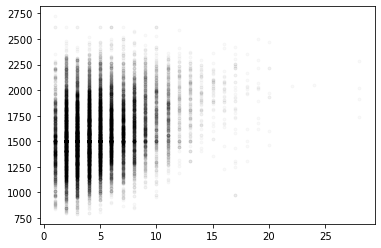

In [111]:
turns = games.sort_values(by='turns')
plt.scatter(turns['opening_ply'],turns['black_rating'],color='k',alpha=0.025,marker='.')

In [153]:
def plot_ply(df, ax):
    plies = df.groupby('opening_ply').mean()[['white_rating','black_rating']]
    ax.plot(plies.index,plies[['white_rating','black_rating']])

In [148]:
plies = games.groupby('opening_ply').mean()[['white_rating','black_rating']]

In [152]:
plies.index

TypeError: 'Int64Index' object is not callable

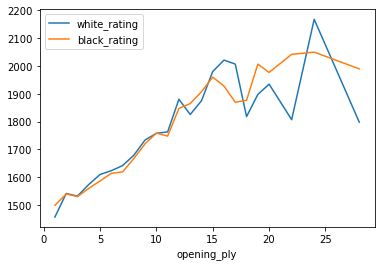

In [134]:
plies.plot()

In [160]:
ply = []
groups = ['A','B','C','D','E']
for i in range(5):
    ply.append(games[games['eco_group'] == groups[i]])

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_differential,eco_group
10,HgKLWPsz,False,1.503350e+12,1.503350e+12,39,mate,white,20+60,daniel_likes_chess,1381,anaissac,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,A00,Van't Kruijs Opening,1,109,A
21,QFCZwY1f,False,1.502950e+12,1.502950e+12,3,resign,white,30+60,shivangithegenius,1094,themannichreaction,1068,d4 e6 Nc3,A40,Horwitz Defense,2,26,A
23,UhXXBOMY,True,1.502950e+12,1.502950e+12,36,resign,white,10+0,robotsmoke,1307,shivangithegenius,1106,c4 Nc6 Nc3 e5 g3 Bc5 Bg2 Nge7 e3 b6 a3 Bb7 b4 ...,A25,English Opening: King's English Variation | R...,4,201,A
37,OR6aULrW,False,1.502210e+12,1.502210e+12,22,resign,black,15+0,shivangithegenius,978,jojo58,1500,d4 Nf6 Nc3 d6 d5 g6 e4 Bg7 Nf3 O-O Ng5 a6 Qf3 ...,A45,Indian Game,2,-522,A
39,G5S21pXK,False,1.502030e+12,1.502030e+12,34,resign,white,30+30,rajuppi,2449,shivangithegenius,978,c4 e5 Nc3 Bc5 g3 Nc6 Bg2 Nf6 Nf3 b6 Nxe5 Bb7 N...,A21,English Opening: King's English Variation | R...,3,1471,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,X0DJ1fJu,True,1.499870e+12,1.499871e+12,73,mate,white,10+10,jamboger,1222,mateuslichess,1262,c4 d5 e3 dxc4 Bxc4 Nc6 a3 Ne5 d4 Nxc4 Nc3 e5 N...,A10,English Opening: Anglo-Scandinavian Defense,2,-40,A
20050,nYOvevdh,True,1.499814e+12,1.499814e+12,9,outoftime,white,10+0,jamboger,1243,yamaguchipolgar,1142,c4 e5 d4 exd4 Qxd4 Nf6 Bg5 Be7 e4,A20,English Opening: King's English Variation,2,101,A
20052,EopEqqAa,True,1.499812e+12,1.499812e+12,37,resign,white,10+10,jamboger,1219,samael88,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4,-31,A
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,471,A


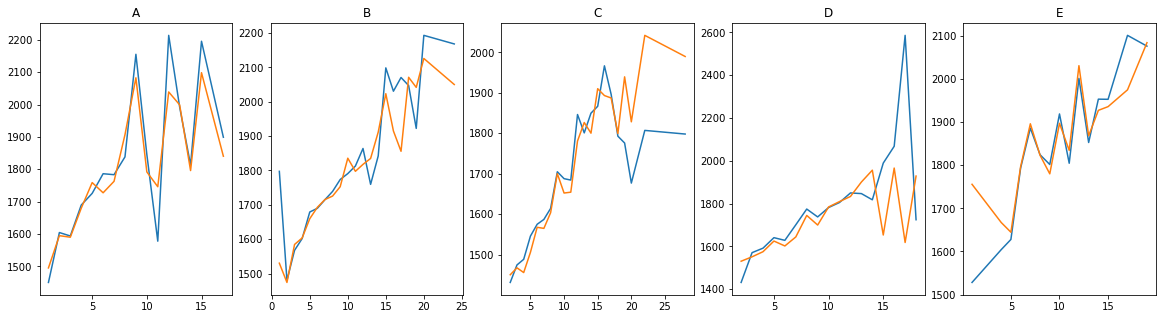

Type:           Figure
String form:    Figure(1440x360)
File:           ~/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py
Docstring:     
The top level container for all the plot elements.

The Figure instance supports callbacks through a *callbacks* attribute
which is a `.CallbackRegistry` instance.  The events you can connect to
are 'dpi_changed', and the callback will be called with ``func(fig)`` where
fig is the `Figure` instance.

Attributes
----------
patch
    The `.Rectangle` instance representing the figure background patch.

suppressComposite
    For multiple figure images, the figure will make composite images
    depending on the renderer option_image_nocomposite function.  If
    *suppressComposite* is a boolean, this will override the renderer.
Init docstring:
Parameters
----------
figsize : 2-tuple of floats, default: :rc:`figure.figsize`
    Figure dimension ``(width, height)`` in inches.

dpi : float, default: :rc:`figure.dpi`
    Dots per inch.

facecolor :

In [166]:
fig, ax = plt.subplots(1,5,figsize=(20,5))
for i in range(5):
    plot_ply(ply[i], ax[i])
    ax[i].set_title(groups[i])

In [193]:
rated = games[games['rated']==True]
unrated = games[games['rated']==False]
users = games['white_id'].value_counts()[games['white_id'].value_counts()>1].keys()

In [263]:
games['average_rating'] = (games['white_rating']+games['black_rating'])/2

In [271]:
# Sort games dataframe into sections based on ELO in range(750,2750,250)
games['elo_range'] = pd.cut(games['average_rating'],range(800,2501,100))
elo_groups = games.groupby('elo_range')
elo_group_names = elo_groups.groups
elo_keys = list(elo_group_names.keys())
elo_dfs = []
for i in range(len(elo_keys)):
    elo_dfs.append(elo_groups.get_group(elo_keys[i]))

In [272]:
elo_dfs[0]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_differential,eco_group,elo_range,average_rating
917,1WxtTGrt,True,1.499310e+12,1.499310e+12,32,resign,white,10+0,leeleeradio,813,mccheese,841,e4 e5 d3 c5 Nc3 Bd6 Nf3 Nc6 Be3 g6 g3 f6 Bh3 f...,C20,King's Pawn Game: Leonardis Variation,3,-28,C,"(800, 900]",827.0
930,WRNkn1iH,True,1.498720e+12,1.498720e+12,74,resign,black,14+12,mccheese,989,hortense,791,d4 d5 e4 dxe4 Bf4 Be6 Bb5+ Bd7 Nc3 Bxb5 Nxb5 e...,D00,Blackmar-Diemer Gambit,3,198,D,"(800, 900]",890.0
1655,YwaFfXra,True,1.498090e+12,1.498090e+12,61,mate,white,10+0,ragnarlothbrook_spb,784,joe-brown,970,e4 e5 Nf3 Bb4 c3 Bc5 Na3 Nf6 Nc4 Nxe4 Nfxe5 Bx...,C40,King's Knight Opening,3,-186,C,"(800, 900]",877.0
1667,4Oie3kEE,True,1.497190e+12,1.497190e+12,47,mate,white,10+0,mata1234,808,joe-brown,973,e3 d5 b3 Bf5 d3 d4 e4 Bg6 Bg5 Nc6 Na3 Nb4 Nb5 ...,A00,Van't Kruijs Opening,1,-165,A,"(800, 900]",890.5
7771,DZsimp1h,True,1.443350e+12,1.443350e+12,3,resign,white,15+0,leptiantdu29,815,xamio,982,e4 e5 Nf3,C40,King's Knight Opening,3,-167,C,"(800, 900]",898.5
11466,XJoTQFBp,True,1.501445e+12,1.501445e+12,2,resign,black,10+0,crazyscientist1,784,tahsinkayas,1006,e4 e5,C20,King's Pawn Game,2,-222,C,"(800, 900]",895.0
11467,DFhHkmdh,True,1.501445e+12,1.501445e+12,2,resign,white,10+0,bassboy,827,crazyscientist1,806,e4 d5,B01,Scandinavian Defense,2,21,B,"(800, 900]",816.5
11478,ZJGXmSUw,True,1.501445e+12,1.501445e+12,2,resign,black,10+0,crazyscientist1,889,criscola,850,e4 e5,C20,King's Pawn Game,2,39,C,"(800, 900]",869.5
11479,EtSMEwpG,True,1.501445e+12,1.501445e+12,3,resign,white,10+0,criscola,833,crazyscientist1,930,d4 e5 dxe5,A40,Englund Gambit,2,-97,A,"(800, 900]",881.5
14878,lWZQsMkU,True,1.493495e+12,1.493496e+12,62,resign,black,15+15,natalua,793,marigw,961,d4 d5 b4 c6 f4 b5 Nf3 f5 h4 g6 Nbd2 h5 g3 Nf6 ...,D00,Queen's Pawn Game,2,-168,D,"(800, 900]",877.0


In [274]:
games['rating_different'].describe()

count    20058.000000
mean         7.799880
std        249.036667
min      -1605.000000
25%       -108.000000
50%          3.000000
75%        122.000000
max       1499.000000
Name: rating_differential, dtype: float64

In [276]:
games[games['rating_differential'] == -1605]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_differential,eco_group,elo_range,average_rating
5373,zkk33R0Z,False,1.496890e+12,1.496890e+12,40,mate,black,15+0,burks,1016,lance5500,2621,Nc3 c5 Nf3 Nc6 Nb5 Nf6 c4 g6 Ng5 Bg7 d3 O-O Bf...,A00,Van Geet Opening,1,-1605,A,"(1800, 1900]",1818.5
5374,5gtNuMhB,False,1.496880e+12,1.496880e+12,48,mate,black,10+0,burks,1016,lance5500,2621,Nf3 Nf6 d4 g6 Bg5 Bg7 Nc3 d5 Qd3 Bf5 Qb5+ Nc6 ...,A48,Torre Attack,5,-1605,A,"(1800, 1900]",1818.5
